In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_500')

data_dir = '/content/grayscale_defungi_500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_500.zip to grayscale_defungi_500 (1).zip


In [ ]:
!pip install scikit-image xgboost tqdm

In [ ]:
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

In [ ]:
lbp_radius = 1
lbp_n_points = 8 * lbp_radius
features = []
labels = []
for cls in tqdm(class_names):
    cls_path = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        try:
            img = imread(img_path, as_gray=True)
            lbp = local_binary_pattern(img, lbp_n_points, lbp_radius, method='uniform')
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, lbp_n_points + 3), density=True)
            features.append(lbp_hist)
            labels.append(cls)
        except Exception as e:
            print(f"Skipping {img_file}: {e}")


100%|██████████| 5/5 [00:21<00:00,  4.20s/it]


In [ ]:
X = np.array(features)
y = np.array(labels)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}
#print("\n Model result before tuning")
for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:51:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.4980
              precision    recall  f1-score   support

          H1       0.51      0.70      0.59       100
          H2       0.36      0.35      0.35       100
          H3       0.49      0.57      0.53       100
          H5       0.57      0.52      0.54       100
          H6       0.59      0.35      0.44       100

    accuracy                           0.50       500
   macro avg       0.51      0.50      0.49       500
weighted avg       0.51      0.50      0.49       500


Random Forest Accuracy: 0.5120
              precision    recall  f1-score   support

          H1       0.51      0.63      0.57       100
          H2       0.41      0.43      0.42       100
          H3       0.49      0.50      0.49       100
          H5       0.57      0.57      0.57       100
          H6       0.61      0.43      0.51       100

    accuracy                           0.51       500
   macro avg       0.52      0.51      0.51       500
weighted avg       0.52

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_1500')

data_dir = '/content/grayscale_defungi_1500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_1500.zip to grayscale_defungi_1500.zip


In [ ]:
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

In [ ]:
lbp_radius = 1
lbp_n_points = 8 * lbp_radius
features = []
labels = []
for cls in tqdm(class_names):
    cls_path = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        try:
            img = imread(img_path, as_gray=True)
            lbp = local_binary_pattern(img, lbp_n_points, lbp_radius, method='uniform')
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, lbp_n_points + 3), density=True)
            features.append(lbp_hist)
            labels.append(cls)
        except Exception as e:
            print(f"Skipping {img_file}: {e}")

100%|██████████| 5/5 [01:03<00:00, 12.71s/it]


In [ ]:
X = np.array(features)
y = np.array(labels)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:54:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.5427
              precision    recall  f1-score   support

          H1       0.55      0.73      0.63       300
          H2       0.40      0.40      0.40       300
          H3       0.53      0.58      0.55       300
          H5       0.65      0.59      0.62       300
          H6       0.61      0.42      0.50       300

    accuracy                           0.54      1500
   macro avg       0.55      0.54      0.54      1500
weighted avg       0.55      0.54      0.54      1500


Random Forest Accuracy: 0.5960
              precision    recall  f1-score   support

          H1       0.57      0.72      0.64       300
          H2       0.49      0.46      0.48       300
          H3       0.61      0.58      0.59       300
          H5       0.69      0.67      0.68       300
          H6       0.62      0.55      0.59       300

    accuracy                           0.60      1500
   macro avg       0.60      0.60      0.59      1500
weighted avg       0.60

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_2500')

data_dir = '/content/grayscale_defungi_2500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_2500.zip to grayscale_defungi_2500.zip


In [ ]:
lbp_radius = 1
lbp_n_points = 8 * lbp_radius
features = []
labels = []
for cls in tqdm(class_names):
    cls_path = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        try:
            img = imread(img_path, as_gray=True)
            lbp = local_binary_pattern(img, lbp_n_points, lbp_radius, method='uniform')
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, lbp_n_points + 3), density=True)
            features.append(lbp_hist)
            labels.append(cls)
        except Exception as e:
            print(f"Skipping {img_file}: {e}")

100%|██████████| 5/5 [01:44<00:00, 20.81s/it]


In [ ]:
X = np.array(features)
y = np.array(labels)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}
#print("\n Model result before tuning")
for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:59:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.5600
              precision    recall  f1-score   support

          H1       0.60      0.71      0.65       500
          H2       0.43      0.44      0.44       500
          H3       0.52      0.57      0.54       500
          H5       0.64      0.61      0.62       500
          H6       0.63      0.47      0.54       500

    accuracy                           0.56      2500
   macro avg       0.56      0.56      0.56      2500
weighted avg       0.56      0.56      0.56      2500


Random Forest Accuracy: 0.6008
              precision    recall  f1-score   support

          H1       0.60      0.68      0.63       500
          H2       0.48      0.45      0.46       500
          H3       0.58      0.61      0.60       500
          H5       0.70      0.67      0.69       500
          H6       0.65      0.59      0.62       500

    accuracy                           0.60      2500
   macro avg       0.60      0.60      0.60      2500
weighted avg       0.60

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_500')

data_dir = '/content/grayscale_defungi_500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_500.zip to grayscale_defungi_500 (2).zip


In [ ]:
from skimage.feature import hog
from skimage.io import imread
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm
import numpy as np


In [ ]:
hog_pixels_per_cell = (16, 16)
hog_cells_per_block = (2, 2)
features = []
labels = []
for cls in tqdm(class_names):
    cls_path = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        try:
            img = imread(img_path, as_gray=True)
            hog_feat = hog(img, pixels_per_cell=hog_pixels_per_cell,
                           cells_per_block=hog_cells_per_block,
                           feature_vector=True)
            features.append(hog_feat)
            labels.append(cls)
        except Exception as e:
            print(f"Skipping {img_file}: {e}")

100%|██████████| 5/5 [00:22<00:00,  4.48s/it]


In [ ]:
X = np.array(features)
y = np.array(labels)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:02:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.4520
              precision    recall  f1-score   support

          H1       0.54      0.61      0.57       100
          H2       0.33      0.36      0.34       100
          H3       0.38      0.34      0.36       100
          H5       0.52      0.46      0.49       100
          H6       0.50      0.49      0.49       100

    accuracy                           0.45       500
   macro avg       0.45      0.45      0.45       500
weighted avg       0.45      0.45      0.45       500


Random Forest Accuracy: 0.4280
              precision    recall  f1-score   support

          H1       0.51      0.69      0.58       100
          H2       0.34      0.40      0.37       100
          H3       0.35      0.24      0.28       100
          H5       0.50      0.41      0.45       100
          H6       0.42      0.40      0.41       100

    accuracy                           0.43       500
   macro avg       0.42      0.43      0.42       500
weighted avg       0.42

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_1500')

data_dir = '/content/grayscale_defungi_1500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_1500.zip to grayscale_defungi_1500 (1).zip


In [ ]:
hog_pixels_per_cell = (16, 16)
hog_cells_per_block = (2, 2)
features = []
labels = []
for cls in tqdm(class_names):
    cls_path = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        try:
            img = imread(img_path, as_gray=True)
            hog_feat = hog(img, pixels_per_cell=hog_pixels_per_cell,
                           cells_per_block=hog_cells_per_block,
                           feature_vector=True)
            features.append(hog_feat)
            labels.append(cls)
        except Exception as e:
            print(f"Skipping {img_file}: {e}")

100%|██████████| 5/5 [01:06<00:00, 13.37s/it]


In [ ]:
X = np.array(features)
y = np.array(labels)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:31:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.4973
              precision    recall  f1-score   support

          H1       0.54      0.68      0.60       300
          H2       0.38      0.44      0.41       300
          H3       0.45      0.39      0.42       300
          H5       0.55      0.49      0.52       300
          H6       0.59      0.49      0.53       300

    accuracy                           0.50      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.50      0.50      0.50      1500


Random Forest Accuracy: 0.4500
              precision    recall  f1-score   support

          H1       0.49      0.71      0.58       300
          H2       0.34      0.39      0.36       300
          H3       0.43      0.29      0.35       300
          H5       0.53      0.42      0.47       300
          H6       0.48      0.43      0.45       300

    accuracy                           0.45      1500
   macro avg       0.45      0.45      0.44      1500
weighted avg       0.45

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_2500')

data_dir = '/content/grayscale_defungi_2500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_2500.zip to grayscale_defungi_2500 (2).zip


In [ ]:
hog_pixels_per_cell = (16, 16)
hog_cells_per_block = (2, 2)
features = []
labels = []
for cls in tqdm(class_names):
    cls_path = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        try:
            img = imread(img_path, as_gray=True)
            hog_feat = hog(img, pixels_per_cell=hog_pixels_per_cell,
                           cells_per_block=hog_cells_per_block,
                           feature_vector=True)
            features.append(hog_feat)
            labels.append(cls)
        except Exception as e:
            print(f"Skipping {img_file}: {e}")

100%|██████████| 5/5 [01:51<00:00, 22.23s/it]


In [ ]:
X = np.array(features)
y = np.array(labels)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========== Baseline (Before Tuning) ==========
svm = SVC(kernel='rbf', probability=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}
#print("\n Model result before tuning")
for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:33:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.5288
              precision    recall  f1-score   support

          H1       0.57      0.65      0.61       500
          H2       0.40      0.47      0.43       500
          H3       0.50      0.49      0.49       500
          H5       0.58      0.56      0.57       500
          H6       0.63      0.47      0.54       500

    accuracy                           0.53      2500
   macro avg       0.54      0.53      0.53      2500
weighted avg       0.54      0.53      0.53      2500


Random Forest Accuracy: 0.4612
              precision    recall  f1-score   support

          H1       0.51      0.65      0.57       500
          H2       0.36      0.45      0.40       500
          H3       0.40      0.28      0.33       500
          H5       0.55      0.44      0.48       500
          H6       0.51      0.48      0.49       500

    accuracy                           0.46      2500
   macro avg       0.46      0.46      0.46      2500
weighted avg       0.46

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_500')

data_dir = '/content/grayscale_defungi_500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_500.zip to grayscale_defungi_500.zip


In [ ]:
!pip install scikit-image xgboost tqdm

import numpy as np
from tqdm import tqdm
from skimage.io import imread
from skimage.feature import hog, local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# LBP params
lbp_radius = 1
lbp_n_points = 8 * lbp_radius

# HOG params
hog_pixels_per_cell = (16, 16)
hog_cells_per_block = (2, 2)
hog_orientations = 9
hog_block_norm = 'L2-Hys'

features = []
labels = []

for cls in tqdm(class_names):
    cls_path = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        try:
            img = imread(img_path, as_gray=True)


            lbp = local_binary_pattern(img, lbp_n_points, lbp_radius, method='uniform')
            lbp_hist, _ = np.histogram(
                lbp.ravel(),
                bins=np.arange(0, lbp_n_points + 3),
                density=True
            )


            hog_feat = hog(
                img,
                pixels_per_cell=hog_pixels_per_cell,
                cells_per_block=hog_cells_per_block,
                orientations=hog_orientations,
                block_norm=hog_block_norm,
                feature_vector=True
            )

            combined_feat = np.concatenate((lbp_hist, hog_feat))
            features.append(combined_feat)
            labels.append(cls)

        except Exception as e:
            print(f"Skipping {img_file}: {e}")

100%|██████████| 5/5 [03:29<00:00, 41.87s/it]


In [ ]:
X = np.array(features)
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

svm = SVC(kernel='rbf', probability=True, random_state=42)
rf  = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:23:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.4640
              precision    recall  f1-score   support

          H1       0.54      0.61      0.57       100
          H2       0.34      0.37      0.35       100
          H3       0.38      0.35      0.37       100
          H5       0.54      0.49      0.52       100
          H6       0.52      0.50      0.51       100

    accuracy                           0.46       500
   macro avg       0.46      0.46      0.46       500
weighted avg       0.46      0.46      0.46       500


Random Forest Accuracy: 0.4480
              precision    recall  f1-score   support

          H1       0.51      0.65      0.57       100
          H2       0.35      0.37      0.36       100
          H3       0.41      0.35      0.38       100
          H5       0.55      0.48      0.51       100
          H6       0.42      0.39      0.41       100

    accuracy                           0.45       500
   macro avg       0.45      0.45      0.44       500
weighted avg       0.45

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_1500')

data_dir = '/content/grayscale_defungi_1500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_1500.zip to grayscale_defungi_1500.zip


In [ ]:
X = np.array(features)
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

svm = SVC(kernel='rbf', probability=True, random_state=42)
rf  = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:56:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.5093
              precision    recall  f1-score   support

          H1       0.54      0.69      0.60       300
          H2       0.38      0.43      0.41       300
          H3       0.48      0.46      0.47       300
          H5       0.59      0.49      0.54       300
          H6       0.59      0.48      0.53       300

    accuracy                           0.51      1500
   macro avg       0.52      0.51      0.51      1500
weighted avg       0.52      0.51      0.51      1500


Random Forest Accuracy: 0.4987
              precision    recall  f1-score   support

          H1       0.54      0.69      0.61       300
          H2       0.40      0.46      0.42       300
          H3       0.46      0.42      0.44       300
          H5       0.60      0.49      0.54       300
          H6       0.51      0.43      0.47       300

    accuracy                           0.50      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.50

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/grayscale_defungi_2500')

data_dir = '/content/grayscale_defungi_2500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving grayscale_defungi_2500.zip to grayscale_defungi_2500.zip


In [ ]:
X = np.array(features)
y = np.array(labels)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

svm = SVC(kernel='rbf', probability=True, random_state=42)
rf  = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

models = {'SVM': svm, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:05:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



SVM Accuracy: 0.5472
              precision    recall  f1-score   support

          H1       0.57      0.65      0.61       500
          H2       0.41      0.48      0.44       500
          H3       0.52      0.57      0.54       500
          H5       0.64      0.55      0.59       500
          H6       0.66      0.49      0.56       500

    accuracy                           0.55      2500
   macro avg       0.56      0.55      0.55      2500
weighted avg       0.56      0.55      0.55      2500


Random Forest Accuracy: 0.5148
              precision    recall  f1-score   support

          H1       0.57      0.65      0.61       500
          H2       0.39      0.46      0.42       500
          H3       0.48      0.48      0.48       500
          H5       0.60      0.54      0.57       500
          H6       0.56      0.44      0.49       500

    accuracy                           0.51      2500
   macro avg       0.52      0.51      0.52      2500
weighted avg       0.52

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/balanced_defungi_500')

data_dir = '/content/balanced_defungi_500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving balanced_defungi_500.zip to balanced_defungi_500.zip


In [ ]:
!pip install tensorflow matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

batch_size = 32
img_size = (224, 224)
initial_epochs = 15
finetune_epochs = 30
UNFREEZE_FROM = 100
use_label_smoothing = True




Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.2995 - loss: 1.9366
Epoch 1: val_loss improved from inf to 1.39644, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 515ms/step - accuracy: 0.3002 - loss: 1.9348 - val_accuracy: 0.4580 - val_loss: 1.3964 - learning_rate: 1.0000e-04
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.4108 - loss: 1.6116
Epoch 2: val_loss improved from 1.39644 to 1.32040, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.4109 - loss: 1.6114 - val_accuracy: 0.4840 - val_loss: 1.3204 - learning_rate: 1.0000e-04
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.4831 - loss: 1.4510
Epoch 3: val_loss improved from 1.32040 to 1.27708, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - accuracy: 0.4833 - loss: 1.4508 - val_accuracy: 0.5120 - val_loss: 1.2771 - learning_rate: 1.0000e-04
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.4944 - loss: 1.4067
Epoch 4: val_loss improved from 1.27708 to 1.27203, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.4945 - loss: 1.4064 - val_accuracy: 0.5060 - val_loss: 1.2720 - learning_rate: 1.0000e-04
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.5332 - loss: 1.3149
Epoch 5: val_loss improved from 1.27203 to 1.26156, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.5332 - loss: 1.3152 - val_accuracy: 0.5140 - val_loss: 1.2616 - learning_rate: 1.0000e-04
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5718 - loss: 1.2586
Epoch 6: val_loss improved from 1.26156 to 1.24529, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.5716 - loss: 1.2589 - val_accuracy: 0.5200 - val_loss: 1.2453 - learning_rate: 1.0000e-04
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.5690 - loss: 1.2575
Epoch 7: val_loss improved from 1.24529 to 1.23942, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.5691 - loss: 1.2572 - val_accuracy: 0.5280 - val_loss: 1.2394 - learning_rate: 1.0000e-04
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.5756 - loss: 1.2282
Epoch 8: val_loss improved from 1.23942 to 1.21586, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.5757 - loss: 1.2279 - val_accuracy: 0.5340 - val_loss: 1.2159 - learning_rate: 1.0000e-04
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.5928 - loss: 1.1943
Epoch 9: val_loss improved from 1.21586 to 1.20732, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.5928 - loss: 1.1944 - val_accuracy: 0.5420 - val_loss: 1.2073 - learning_rate: 1.0000e-04
Epoch 10/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.5943 - loss: 1.1494
Epoch 10: val_loss did not improve from 1.20732
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - accuracy: 0.5943 - loss: 1.1495 - val_accuracy: 0.5380 - val_loss: 1.2106 - learning_rate: 1.0000e-04
Epoch 11/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.6108 - loss: 1.1326
Epoch 11: val_loss improved from 1.20732 to 1.18822, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - accuracy: 0.6106 - loss: 1.1328 - val_accuracy: 0.5500 - val_loss: 1.1882 - learning_rate: 1.0000e-04
Epoch 12/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.5963 - loss: 1.1729
Epoch 12: val_loss improved from 1.18822 to 1.17572, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.5967 - loss: 1.1722 - val_accuracy: 0.5500 - val_loss: 1.1757 - learning_rate: 1.0000e-04
Epoch 13/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6214 - loss: 1.1143
Epoch 13: val_loss did not improve from 1.17572
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - accuracy: 0.6214 - loss: 1.1145 - val_accuracy: 0.5560 - val_loss: 1.1758 - learning_rate: 1.0000e-04
Epoch 14/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6463 - loss: 1.0874
Epoch 14: val_loss improved from 1.17572 to 1.17033, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.6462 - loss: 1.0876 - val_accuracy: 0.5520 - val_loss: 1.1703 - learning_rate: 1.0000e-04
Epoch 15/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.6735 - loss: 1.0553
Epoch 15: val_loss improved from 1.17033 to 1.15453, saving model to resnet50_stage1_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.6732 - loss: 1.0556 - val_accuracy: 0.5600 - val_loss: 1.1545 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 15.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.5112 - loss: 1.5076
Epoch 1: val_loss improved from inf to 1.14638, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 600ms/step - accuracy: 0.5117 - loss: 1.5059 - val_accuracy: 0.5980 - val_loss: 1.1464 - learning_rate: 1.0000e-05
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.6327 - loss: 1.1599
Epoch 2: val_loss improved from 1.14638 to 1.14382, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.6327 - loss: 1.1600 - val_accuracy: 0.5980 - val_loss: 1.1438 - learning_rate: 1.0000e-05
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.6842 - loss: 1.0426
Epoch 3: val_loss improved from 1.14382 to 1.14048, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.6845 - loss: 1.0424 - val_accuracy: 0.6060 - val_loss: 1.1405 - learning_rate: 1.0000e-05
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7104 - loss: 0.9678
Epoch 4: val_loss improved from 1.14048 to 1.10874, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.7105 - loss: 0.9678 - val_accuracy: 0.6300 - val_loss: 1.1087 - learning_rate: 1.0000e-05
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.7117 - loss: 0.9727
Epoch 5: val_loss improved from 1.10874 to 1.09460, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 344ms/step - accuracy: 0.7118 - loss: 0.9726 - val_accuracy: 0.6420 - val_loss: 1.0946 - learning_rate: 1.0000e-05
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.7645 - loss: 0.9059
Epoch 6: val_loss improved from 1.09460 to 1.08759, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - accuracy: 0.7644 - loss: 0.9060 - val_accuracy: 0.6380 - val_loss: 1.0876 - learning_rate: 1.0000e-05
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.7639 - loss: 0.8685
Epoch 7: val_loss improved from 1.08759 to 1.08501, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - accuracy: 0.7639 - loss: 0.8687 - val_accuracy: 0.6500 - val_loss: 1.0850 - learning_rate: 1.0000e-05
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.7655 - loss: 0.8661
Epoch 8: val_loss improved from 1.08501 to 1.06258, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.7657 - loss: 0.8661 - val_accuracy: 0.6680 - val_loss: 1.0626 - learning_rate: 1.0000e-05
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7966 - loss: 0.8273
Epoch 9: val_loss improved from 1.06258 to 1.05401, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.7964 - loss: 0.8274 - val_accuracy: 0.6760 - val_loss: 1.0540 - learning_rate: 1.0000e-05
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.8129 - loss: 0.8168
Epoch 10: val_loss did not improve from 1.05401
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.8128 - loss: 0.8169 - val_accuracy: 0.6700 - val_loss: 1.0637 - learning_rate: 1.0000e-05
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.8131 - loss: 0.8059
Epoch 11: val_loss improved from 1.05401 to 1.04408, saving model to resnet50_finetuned_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - accuracy: 0.8131 - loss: 0.8060 - val_accuracy: 0.6780 - val_loss: 1.0441 - learning_rate: 1.0000e-05
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8314 - loss: 0.7664
Epoch 12: val_loss did not improve from 1.04408
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.8314 - loss: 0.7665 - val_accuracy: 0.6860 - val_loss: 1.0572 - learning_rate: 1.0000e-05
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8309 - loss: 0.7641
Epoch 13: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 13: val_loss did not improve from 1.04408
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - accuracy: 0.8308 - loss: 0.7642 - val_accuracy: 0.6980 - val_loss: 1.0443 - learning_rate: 1.0000e-05
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8328 - loss: 0.7592
Epoch 14: val_loss did not improve from 1.04408
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.8328 - loss: 0.7593 - 

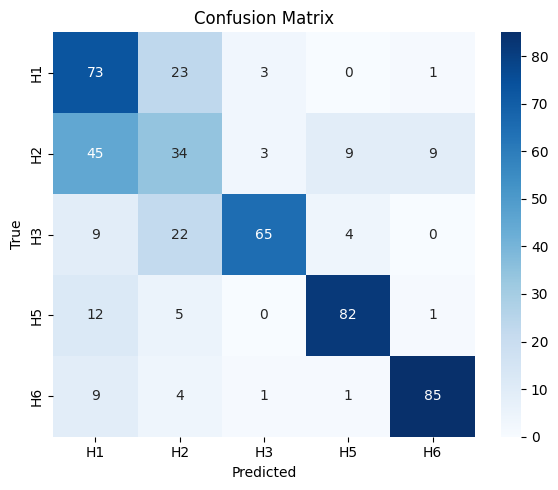

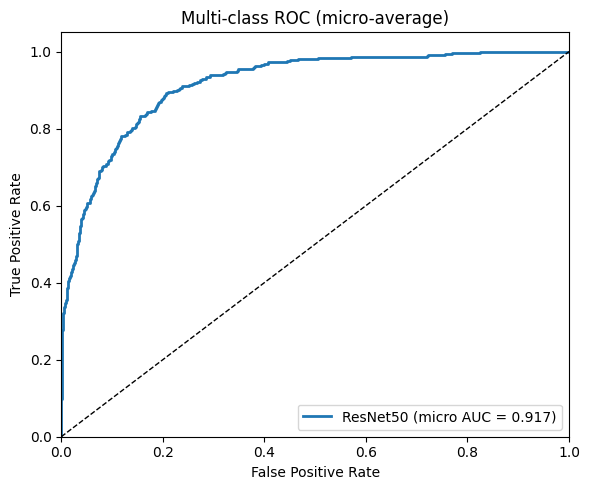

In [ ]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_gen.num_classes
class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

loss_fn = CategoricalCrossentropy(label_smoothing=0.1) if use_label_smoothing else 'categorical_crossentropy'

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=loss_fn,
    metrics=['accuracy']
)

cbks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint('resnet50_stage1_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs,
    callbacks=cbks,
    verbose=1
)

for layer in base_model.layers[UNFREEZE_FROM:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=loss_fn,
    metrics=['accuracy']
)

cbks_ft = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint('resnet50_finetuned_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=finetune_epochs,
    callbacks=cbks_ft,
    verbose=1
)

val_gen.reset()
probs = model.predict(val_gen, verbose=1)
y_pred = np.argmax(probs, axis=1)
y_true = val_gen.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=[idx_to_class[i] for i in range(num_classes)]))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[idx_to_class[i] for i in range(num_classes)],
            yticklabels=[idx_to_class[i] for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

def plot_multiclass_roc(y_true, y_score, class_names):
    y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f'ResNet50 (micro AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC (micro-average)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plot_multiclass_roc(y_true, probs, [idx_to_class[i] for i in range(num_classes)])

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/balanced_defungi_1500')

data_dir = '/content/balanced_defungi_1500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving balanced_defungi_1500.zip to balanced_defungi_1500.zip


In [ ]:
!pip install tensorflow matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize


In [ ]:
batch_size = 64
img_size = (224, 224)
initial_epochs = 7
finetune_epochs = 15
UNFREEZE_FROM = 140
use_label_smoothing = True

Found 5938 images belonging to 5 classes.
Found 1484 images belonging to 5 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.4434 - loss: 1.5942
Epoch 1: val_loss improved from inf to 1.17487, saving model to resnet50_stage1_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 85s 786ms/step - accuracy: 0.4445 - loss: 1.5915 - val_accuracy: 0.5964 - val_loss: 1.1749 - learning_rate: 0.0010
Epoch 2/7
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.6645 - loss: 1.0576
Epoch 2: val_loss improved from 1.17487 to 1.08238, saving model to resnet50_stage1_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 664ms/step - accuracy: 0.6646 - loss: 1.0574 - val_accuracy: 0.6456 - val_loss: 1.0824 - learning_rate: 0.0010
Epoch 3/7
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.7153 - loss: 0.9464
Epoch 3: val_loss did not improve from 1.08238
93/93 ━━━━━━━━━━━━━━━━━━━━ 61s 660ms/step - accuracy: 0.7153 - loss: 0.9465 - val_accuracy: 0.6307 - val_loss: 1.1082 - learning_rate: 0.0010
Epoch 4/7
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.7381 - loss: 0.9256
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 4: val_loss did not improve from 1.08238
93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 665ms/step - accuracy: 0.7381 - loss: 0.9255 - val_accuracy: 0.6226 - val_loss: 1.0850 - learning_rate: 0.0010
Epoch 5/7
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.7505 - loss: 0.9009
Epoch 5: val_loss improved from 1.08238 to 1.06170, saving model to resnet50_stage1_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 666ms/step - accuracy: 0.7505 - loss: 0.9009 - val_accuracy: 0.6415 - val_loss: 1.0617 - learning_rate: 2.0000e-04
Epoch 6/7
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.7510 - loss: 0.8922
Epoch 6: val_loss did not improve from 1.06170
93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 663ms/step - accuracy: 0.7510 - loss: 0.8922 - val_accuracy: 0.6395 - val_loss: 1.0715 - learning_rate: 2.0000e-04
Epoch 7/7
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.7632 - loss: 0.8700
Epoch 7: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 7: val_loss did not improve from 1.06170
93/93 ━━━━━━━━━━━━━━━━━━━━ 61s 659ms/step - accuracy: 0.7631 - loss: 0.8701 - val_accuracy: 0.6456 - val_loss: 1.0683 - learning_rate: 2.0000e-04
Restoring model weights from the end of the best epoch: 5.
Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 686ms/step - accuracy: 0.6544 - loss: 1.1406
Epoch 1: val_loss improved from inf to 1.11775, saving model to resnet50_fi

93/93 ━━━━━━━━━━━━━━━━━━━━ 92s 782ms/step - accuracy: 0.6548 - loss: 1.1397 - val_accuracy: 0.6381 - val_loss: 1.1178 - learning_rate: 1.0000e-05
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.7375 - loss: 0.9486
Epoch 2: val_loss improved from 1.11775 to 1.07282, saving model to resnet50_finetuned_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 63s 675ms/step - accuracy: 0.7376 - loss: 0.9484 - val_accuracy: 0.6664 - val_loss: 1.0728 - learning_rate: 1.0000e-05
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.7623 - loss: 0.8968
Epoch 3: val_loss improved from 1.07282 to 1.04709, saving model to resnet50_finetuned_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 668ms/step - accuracy: 0.7623 - loss: 0.8967 - val_accuracy: 0.6745 - val_loss: 1.0471 - learning_rate: 1.0000e-05
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.7796 - loss: 0.8676
Epoch 4: val_loss improved from 1.04709 to 1.03929, saving model to resnet50_finetuned_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 671ms/step - accuracy: 0.7796 - loss: 0.8676 - val_accuracy: 0.6846 - val_loss: 1.0393 - learning_rate: 1.0000e-05
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.7842 - loss: 0.8559
Epoch 5: val_loss improved from 1.03929 to 1.03606, saving model to resnet50_finetuned_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 63s 677ms/step - accuracy: 0.7843 - loss: 0.8557 - val_accuracy: 0.6887 - val_loss: 1.0361 - learning_rate: 1.0000e-05
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.8115 - loss: 0.8142
Epoch 6: val_loss improved from 1.03606 to 1.02603, saving model to resnet50_finetuned_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 666ms/step - accuracy: 0.8115 - loss: 0.8142 - val_accuracy: 0.6961 - val_loss: 1.0260 - learning_rate: 1.0000e-05
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.8264 - loss: 0.7784
Epoch 7: val_loss improved from 1.02603 to 1.02189, saving model to resnet50_finetuned_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 669ms/step - accuracy: 0.8263 - loss: 0.7786 - val_accuracy: 0.7008 - val_loss: 1.0219 - learning_rate: 1.0000e-05
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.8208 - loss: 0.7797
Epoch 8: val_loss improved from 1.02189 to 1.01468, saving model to resnet50_finetuned_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 666ms/step - accuracy: 0.8209 - loss: 0.7796 - val_accuracy: 0.7028 - val_loss: 1.0147 - learning_rate: 1.0000e-05
Epoch 9/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.8345 - loss: 0.7555
Epoch 9: val_loss improved from 1.01468 to 1.00846, saving model to resnet50_finetuned_best.h5


93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 667ms/step - accuracy: 0.8345 - loss: 0.7555 - val_accuracy: 0.7136 - val_loss: 1.0085 - learning_rate: 1.0000e-05
Epoch 10/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.8335 - loss: 0.7563
Epoch 10: val_loss did not improve from 1.00846
93/93 ━━━━━━━━━━━━━━━━━━━━ 61s 658ms/step - accuracy: 0.8336 - loss: 0.7562 - val_accuracy: 0.7102 - val_loss: 1.0226 - learning_rate: 1.0000e-05
Epoch 11/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.8551 - loss: 0.7320
Epoch 11: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 11: val_loss did not improve from 1.00846
93/93 ━━━━━━━━━━━━━━━━━━━━ 61s 655ms/step - accuracy: 0.8551 - loss: 0.7319 - val_accuracy: 0.7156 - val_loss: 1.0190 - learning_rate: 1.0000e-05
Epoch 12/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.8638 - loss: 0.7045
Epoch 12: val_loss did not improve from 1.00846
93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 663ms/step - accuracy: 0.8638 - loss: 0.7046 - 

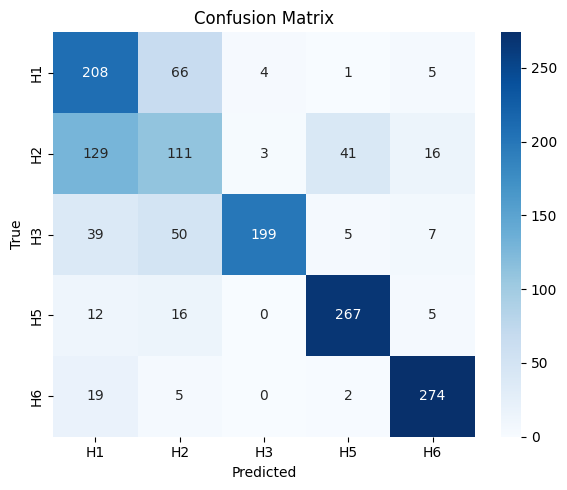

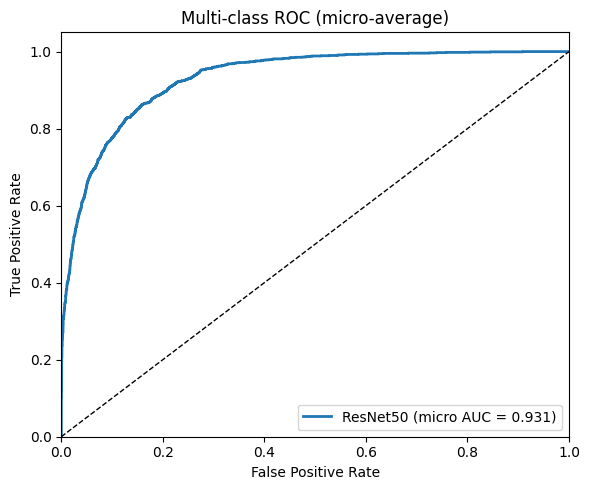

In [ ]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_gen.num_classes
class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

loss_fn = CategoricalCrossentropy(label_smoothing=0.1) if use_label_smoothing else 'categorical_crossentropy'

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=['accuracy']
)

cbks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint('resnet50_stage1_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs,
    callbacks=cbks,
    verbose=1
)


for layer in base_model.layers[UNFREEZE_FROM:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=loss_fn,
    metrics=['accuracy']
)

cbks_ft = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint('resnet50_finetuned_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=finetune_epochs,
    callbacks=cbks_ft,
    verbose=1
)


val_gen.reset()
probs = model.predict(val_gen, verbose=1)
y_pred = np.argmax(probs, axis=1)
y_true = val_gen.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=[idx_to_class[i] for i in range(num_classes)]))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[idx_to_class[i] for i in range(num_classes)],
            yticklabels=[idx_to_class[i] for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


def plot_multiclass_roc(y_true, y_score, class_names):
    y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f'ResNet50 (micro AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC (micro-average)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plot_multiclass_roc(y_true, probs, [idx_to_class[i] for i in range(num_classes)])

In [ ]:
import os
data_dir = '/content/balanced_defungi_2500'
print(os.listdir(data_dir))

['H6', 'H5', 'H1', 'H3', 'H2']


In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/balanced_defungi_2500')

data_dir = '/content/balanced_defungi_2500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving balanced_defungi_2500.zip to balanced_defungi_2500.zip


In [ ]:
!pip install tensorflow matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
batch_size = 64
img_size = (224, 224)
initial_epochs = 7
finetune_epochs = 15
UNFREEZE_FROM = 140
use_label_smoothing = True

Found 10000 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.5010 - loss: 1.4790
Epoch 1: val_loss improved from inf to 1.12084, saving model to resnet50_stage1_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 123s 722ms/step - accuracy: 0.5017 - loss: 1.4774 - val_accuracy: 0.5892 - val_loss: 1.1208 - learning_rate: 0.0010
Epoch 2/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.7109 - loss: 0.9679
Epoch 2: val_loss improved from 1.12084 to 1.06682, saving model to resnet50_stage1_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 656ms/step - accuracy: 0.7109 - loss: 0.9678 - val_accuracy: 0.6416 - val_loss: 1.0668 - learning_rate: 0.0010
Epoch 3/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.7474 - loss: 0.9121
Epoch 3: val_loss did not improve from 1.06682
157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 659ms/step - accuracy: 0.7474 - loss: 0.9121 - val_accuracy: 0.6388 - val_loss: 1.0706 - learning_rate: 0.0010
Epoch 4/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.7533 - loss: 0.8980
Epoch 4: val_loss improved from 1.06682 to 1.04172, saving model to resnet50_stage1_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 104s 659ms/step - accuracy: 0.7533 - loss: 0.8979 - val_accuracy: 0.6456 - val_loss: 1.0417 - learning_rate: 0.0010
Epoch 5/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.7637 - loss: 0.8760
Epoch 5: val_loss did not improve from 1.04172
157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 653ms/step - accuracy: 0.7637 - loss: 0.8760 - val_accuracy: 0.6472 - val_loss: 1.0499 - learning_rate: 0.0010
Epoch 6/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.7642 - loss: 0.8691
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 6: val_loss did not improve from 1.04172
157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 658ms/step - accuracy: 0.7642 - loss: 0.8692 - val_accuracy: 0.6584 - val_loss: 1.0576 - learning_rate: 0.0010
Epoch 7/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.7710 - loss: 0.8610
Epoch 7: val_loss improved from 1.04172 to 1.03677, saving model to resnet50_stage1_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 104s 664ms/step - accuracy: 0.7710 - loss: 0.8610 - val_accuracy: 0.6496 - val_loss: 1.0368 - learning_rate: 2.0000e-04
Restoring model weights from the end of the best epoch: 7.
Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.6744 - loss: 1.1269
Epoch 1: val_loss improved from inf to 1.09651, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 132s 725ms/step - accuracy: 0.6746 - loss: 1.1262 - val_accuracy: 0.6596 - val_loss: 1.0965 - learning_rate: 1.0000e-05
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.7578 - loss: 0.9200
Epoch 2: val_loss improved from 1.09651 to 1.02027, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 653ms/step - accuracy: 0.7578 - loss: 0.9200 - val_accuracy: 0.7028 - val_loss: 1.0203 - learning_rate: 1.0000e-05
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.7730 - loss: 0.8872
Epoch 3: val_loss improved from 1.02027 to 1.01087, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 104s 661ms/step - accuracy: 0.7730 - loss: 0.8872 - val_accuracy: 0.7056 - val_loss: 1.0109 - learning_rate: 1.0000e-05
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.7929 - loss: 0.8450
Epoch 4: val_loss improved from 1.01087 to 1.00936, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 665ms/step - accuracy: 0.7929 - loss: 0.8449 - val_accuracy: 0.7112 - val_loss: 1.0094 - learning_rate: 1.0000e-05
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.8101 - loss: 0.8080
Epoch 5: val_loss improved from 1.00936 to 0.99966, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 667ms/step - accuracy: 0.8101 - loss: 0.8079 - val_accuracy: 0.7168 - val_loss: 0.9997 - learning_rate: 1.0000e-05
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.8173 - loss: 0.7789
Epoch 6: val_loss improved from 0.99966 to 0.99043, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 666ms/step - accuracy: 0.8174 - loss: 0.7789 - val_accuracy: 0.7152 - val_loss: 0.9904 - learning_rate: 1.0000e-05
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.8402 - loss: 0.7534
Epoch 7: val_loss did not improve from 0.99043
157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 659ms/step - accuracy: 0.8402 - loss: 0.7534 - val_accuracy: 0.7140 - val_loss: 0.9916 - learning_rate: 1.0000e-05
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.8449 - loss: 0.7356
Epoch 8: val_loss improved from 0.99043 to 0.98245, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 670ms/step - accuracy: 0.8449 - loss: 0.7356 - val_accuracy: 0.7252 - val_loss: 0.9825 - learning_rate: 1.0000e-05
Epoch 9/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.8487 - loss: 0.7250
Epoch 9: val_loss improved from 0.98245 to 0.98035, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 104s 664ms/step - accuracy: 0.8487 - loss: 0.7250 - val_accuracy: 0.7280 - val_loss: 0.9803 - learning_rate: 1.0000e-05
Epoch 10/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.8587 - loss: 0.7136
Epoch 10: val_loss improved from 0.98035 to 0.96987, saving model to resnet50_finetuned_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 667ms/step - accuracy: 0.8588 - loss: 0.7136 - val_accuracy: 0.7332 - val_loss: 0.9699 - learning_rate: 1.0000e-05
Epoch 11/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.8703 - loss: 0.6909
Epoch 11: val_loss did not improve from 0.96987
157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 656ms/step - accuracy: 0.8704 - loss: 0.6908 - val_accuracy: 0.7180 - val_loss: 1.0014 - learning_rate: 1.0000e-05
Epoch 12/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.8841 - loss: 0.6734
Epoch 12: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 12: val_loss did not improve from 0.96987
157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 655ms/step - accuracy: 0.8841 - loss: 0.6734 - val_accuracy: 0.7340 - val_loss: 0.9887 - learning_rate: 1.0000e-05
Epoch 13/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.8868 - loss: 0.6642
Epoch 13: val_loss did not improve from 0.96987
157/157 ━━━━━━━━━━━━━━━━━━━━ 103s 653ms/step - accuracy: 0.8868

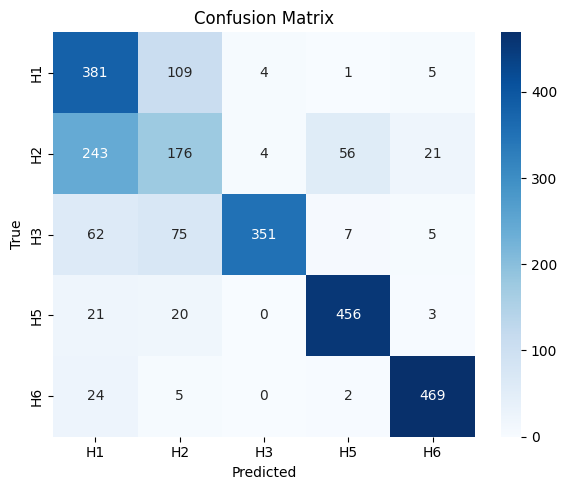

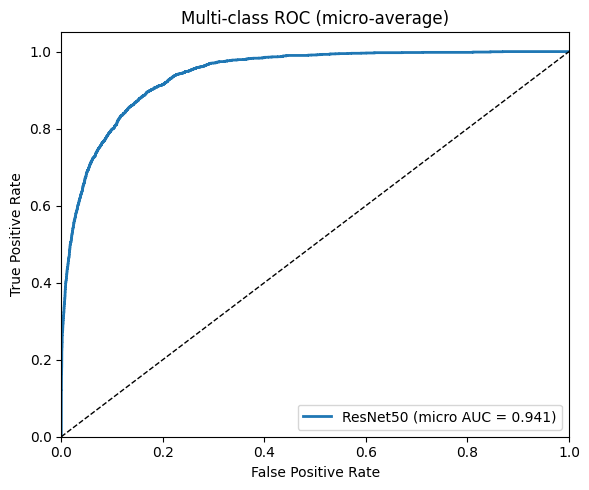

In [ ]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_gen.num_classes
class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

loss_fn = CategoricalCrossentropy(label_smoothing=0.1) if use_label_smoothing else 'categorical_crossentropy'

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=['accuracy']
)

cbks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint('resnet50_stage1_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=initial_epochs,
    callbacks=cbks,
    verbose=1
)

for layer in base_model.layers[UNFREEZE_FROM:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=loss_fn,
    metrics=['accuracy']
)

cbks_ft = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint('resnet50_finetuned_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=finetune_epochs,
    callbacks=cbks_ft,
    verbose=1
)


val_gen.reset()
probs = model.predict(val_gen, verbose=1)
y_pred = np.argmax(probs, axis=1)
y_true = val_gen.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=[idx_to_class[i] for i in range(num_classes)]))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[idx_to_class[i] for i in range(num_classes)],
            yticklabels=[idx_to_class[i] for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

def plot_multiclass_roc(y_true, y_score, class_names):
    y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f'ResNet50 (micro AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC (micro-average)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plot_multiclass_roc(y_true, probs, [idx_to_class[i] for i in range(num_classes)])

/tmp/ipython-input-2608385779.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=full_df, x="Dataset Size (Images/Class)", y="Accuracy", hue="Model",ci=None)


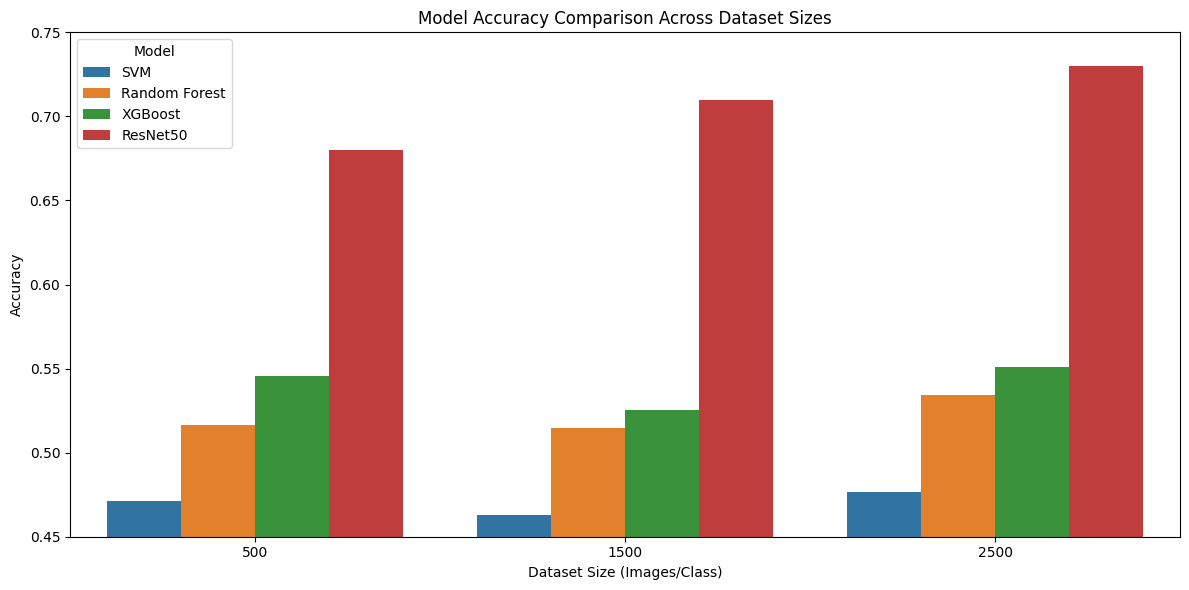

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = {
    "Model": ["SVM", "Random Forest", "XGBoost"] * 9,
    "Feature": (["LBP"] * 9) + (["HOG"] * 9) + (["LBP+HOG"] * 9),
    "Dataset Size (Images/Class)":
        [500,500,500, 1500,1500,1500, 2500,2500,2500] * 3,

    "Accuracy": [

        0.4980, 0.5427, 0.5600,
        0.5120, 0.5960, 0.6008,
        0.5140, 0.5760, 0.5784,

        0.4520, 0.4973, 0.5288,
        0.4280, 0.4500, 0.4612,
        0.4140, 0.4940, 0.5076,

        0.4640, 0.5093, 0.5472,
        0.4480, 0.4987, 0.5148,
        0.5020, 0.5320, 0.5676
    ]
}

resnet_data = {
    "Model": ["ResNet50"] * 3,
    "Feature": ["Deep Learning (Raw)"] * 3,
    "Dataset Size (Images/Class)": [500, 1500, 2500],
    "Accuracy": [0.68, 0.71, 0.73]
}

df = pd.DataFrame(data)
df_resnet = pd.DataFrame(resnet_data)
full_df = pd.concat([df, df_resnet], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=full_df, x="Dataset Size (Images/Class)", y="Accuracy", hue="Model",ci=None)
plt.title("Model Accuracy Comparison Across Dataset Sizes")
plt.ylim(0.45, 0.75)
plt.ylabel("Accuracy")
plt.xlabel("Dataset Size (Images/Class)")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/balanced_defungi_500')

data_dir = '/content/balanced_defungi_500'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving balanced_defungi_500.zip to balanced_defungi_500.zip


In [ ]:
import os, random, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
data_dir = data_dir
batch_size = 64
img_size = (224, 224)
initial_epochs = 7
finetune_epochs = 15
UNFREEZE_FROM = 140
use_label_smoothing = True
STAGE1_PATH = "resnet50_stage1_best.h5"
STAGE2_PATH = "resnet50_finetuned_best.h5"

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Classes: {0: 'H1', 1: 'H2', 2: 'H3', 3: 'H5', 4: 'H6'}

=== Stage 1: Train (frozen backbone) ===
Epoch 1/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.3005 - loss: 1.9448
Epoch 1: val_loss improved from inf to 1.33472, saving model to resnet50_stage1_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 914ms/step - accuracy: 0.3035 - loss: 1.9358 - val_accuracy: 0.5040 - val_loss: 1.3347 - learning_rate: 0.0010
Epoch 2/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.5574 - loss: 1.2877
Epoch 2: val_loss improved from 1.33472 to 1.22042, saving model to resnet50_stage1_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 652ms/step - accuracy: 0.5583 - loss: 1.2857 - val_accuracy: 0.5620 - val_loss: 1.2204 - learning_rate: 0.0010
Epoch 3/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.6301 - loss: 1.1343
Epoch 3: val_loss improved from 1.22042 to 1.11128, saving model to resnet50_stage1_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 651ms/step - accuracy: 0.6307 - loss: 1.1333 - val_accuracy: 0.6280 - val_loss: 1.1113 - learning_rate: 0.0010
Epoch 4/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.6386 - loss: 1.0833
Epoch 4: val_loss did not improve from 1.11128
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 630ms/step - accuracy: 0.6394 - loss: 1.0823 - val_accuracy: 0.6080 - val_loss: 1.1363 - learning_rate: 0.0010
Epoch 5/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.6694 - loss: 1.0370
Epoch 5: val_loss improved from 1.11128 to 1.10464, saving model to resnet50_stage1_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 655ms/step - accuracy: 0.6701 - loss: 1.0364 - val_accuracy: 0.6280 - val_loss: 1.1046 - learning_rate: 0.0010
Epoch 6/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7268 - loss: 0.9821
Epoch 6: val_loss improved from 1.10464 to 1.09855, saving model to resnet50_stage1_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 654ms/step - accuracy: 0.7264 - loss: 0.9822 - val_accuracy: 0.6140 - val_loss: 1.0986 - learning_rate: 0.0010
Epoch 7/7
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.7336 - loss: 0.9318
Epoch 7: val_loss improved from 1.09855 to 1.07327, saving model to resnet50_stage1_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 648ms/step - accuracy: 0.7333 - loss: 0.9320 - val_accuracy: 0.6220 - val_loss: 1.0733 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 7.

=== Stage 2: Fine-tune (unfrozen tail) ===
Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.5858 - loss: 1.3729
Epoch 1: val_loss improved from inf to 1.09713, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5864 - loss: 1.3702 - val_accuracy: 0.6200 - val_loss: 1.0971 - learning_rate: 1.0000e-05
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.6553 - loss: 1.1462
Epoch 2: val_loss did not improve from 1.09713
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 638ms/step - accuracy: 0.6558 - loss: 1.1449 - val_accuracy: 0.6140 - val_loss: 1.1181 - learning_rate: 1.0000e-05
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.7175 - loss: 1.0364
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 3: val_loss did not improve from 1.09713
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 640ms/step - accuracy: 0.7174 - loss: 1.0358 - val_accuracy: 0.6200 - val_loss: 1.1273 - learning_rate: 1.0000e-05
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.7354 - loss: 0.9576
Epoch 4: val_loss improved from 1.09713 to 1.09377, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 671ms/step - accuracy: 0.7352 - loss: 0.9581 - val_accuracy: 0.6340 - val_loss: 1.0938 - learning_rate: 2.0000e-06
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.7260 - loss: 0.9809
Epoch 5: val_loss improved from 1.09377 to 1.07258, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 674ms/step - accuracy: 0.7263 - loss: 0.9803 - val_accuracy: 0.6500 - val_loss: 1.0726 - learning_rate: 2.0000e-06
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.7382 - loss: 0.9374
Epoch 6: val_loss improved from 1.07258 to 1.06324, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 660ms/step - accuracy: 0.7382 - loss: 0.9375 - val_accuracy: 0.6480 - val_loss: 1.0632 - learning_rate: 2.0000e-06
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.7349 - loss: 0.9595
Epoch 7: val_loss improved from 1.06324 to 1.05800, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 671ms/step - accuracy: 0.7350 - loss: 0.9594 - val_accuracy: 0.6520 - val_loss: 1.0580 - learning_rate: 2.0000e-06
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.7448 - loss: 0.9329
Epoch 8: val_loss improved from 1.05800 to 1.05232, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 674ms/step - accuracy: 0.7443 - loss: 0.9333 - val_accuracy: 0.6480 - val_loss: 1.0523 - learning_rate: 2.0000e-06
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7366 - loss: 0.9353
Epoch 9: val_loss improved from 1.05232 to 1.04948, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 662ms/step - accuracy: 0.7371 - loss: 0.9350 - val_accuracy: 0.6500 - val_loss: 1.0495 - learning_rate: 2.0000e-06
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.7745 - loss: 0.9277
Epoch 10: val_loss improved from 1.04948 to 1.04534, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 666ms/step - accuracy: 0.7743 - loss: 0.9274 - val_accuracy: 0.6580 - val_loss: 1.0453 - learning_rate: 2.0000e-06
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.7478 - loss: 0.9350
Epoch 11: val_loss improved from 1.04534 to 1.04254, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 674ms/step - accuracy: 0.7480 - loss: 0.9346 - val_accuracy: 0.6700 - val_loss: 1.0425 - learning_rate: 2.0000e-06
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.7456 - loss: 0.9147
Epoch 12: val_loss improved from 1.04254 to 1.04043, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 687ms/step - accuracy: 0.7454 - loss: 0.9155 - val_accuracy: 0.6720 - val_loss: 1.0404 - learning_rate: 2.0000e-06
Epoch 13/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.7699 - loss: 0.9186
Epoch 13: val_loss improved from 1.04043 to 1.03947, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 675ms/step - accuracy: 0.7699 - loss: 0.9184 - val_accuracy: 0.6700 - val_loss: 1.0395 - learning_rate: 2.0000e-06
Epoch 14/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.7584 - loss: 0.9150
Epoch 14: val_loss improved from 1.03947 to 1.03775, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 663ms/step - accuracy: 0.7583 - loss: 0.9151 - val_accuracy: 0.6660 - val_loss: 1.0378 - learning_rate: 2.0000e-06
Epoch 15/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7657 - loss: 0.9046
Epoch 15: val_loss improved from 1.03775 to 1.03658, saving model to resnet50_finetuned_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 662ms/step - accuracy: 0.7656 - loss: 0.9049 - val_accuracy: 0.6620 - val_loss: 1.0366 - learning_rate: 2.0000e-06
Restoring model weights from the end of the best epoch: 15.


Grad-CAM target layer: conv5_block3_3_conv
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 640ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_2']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


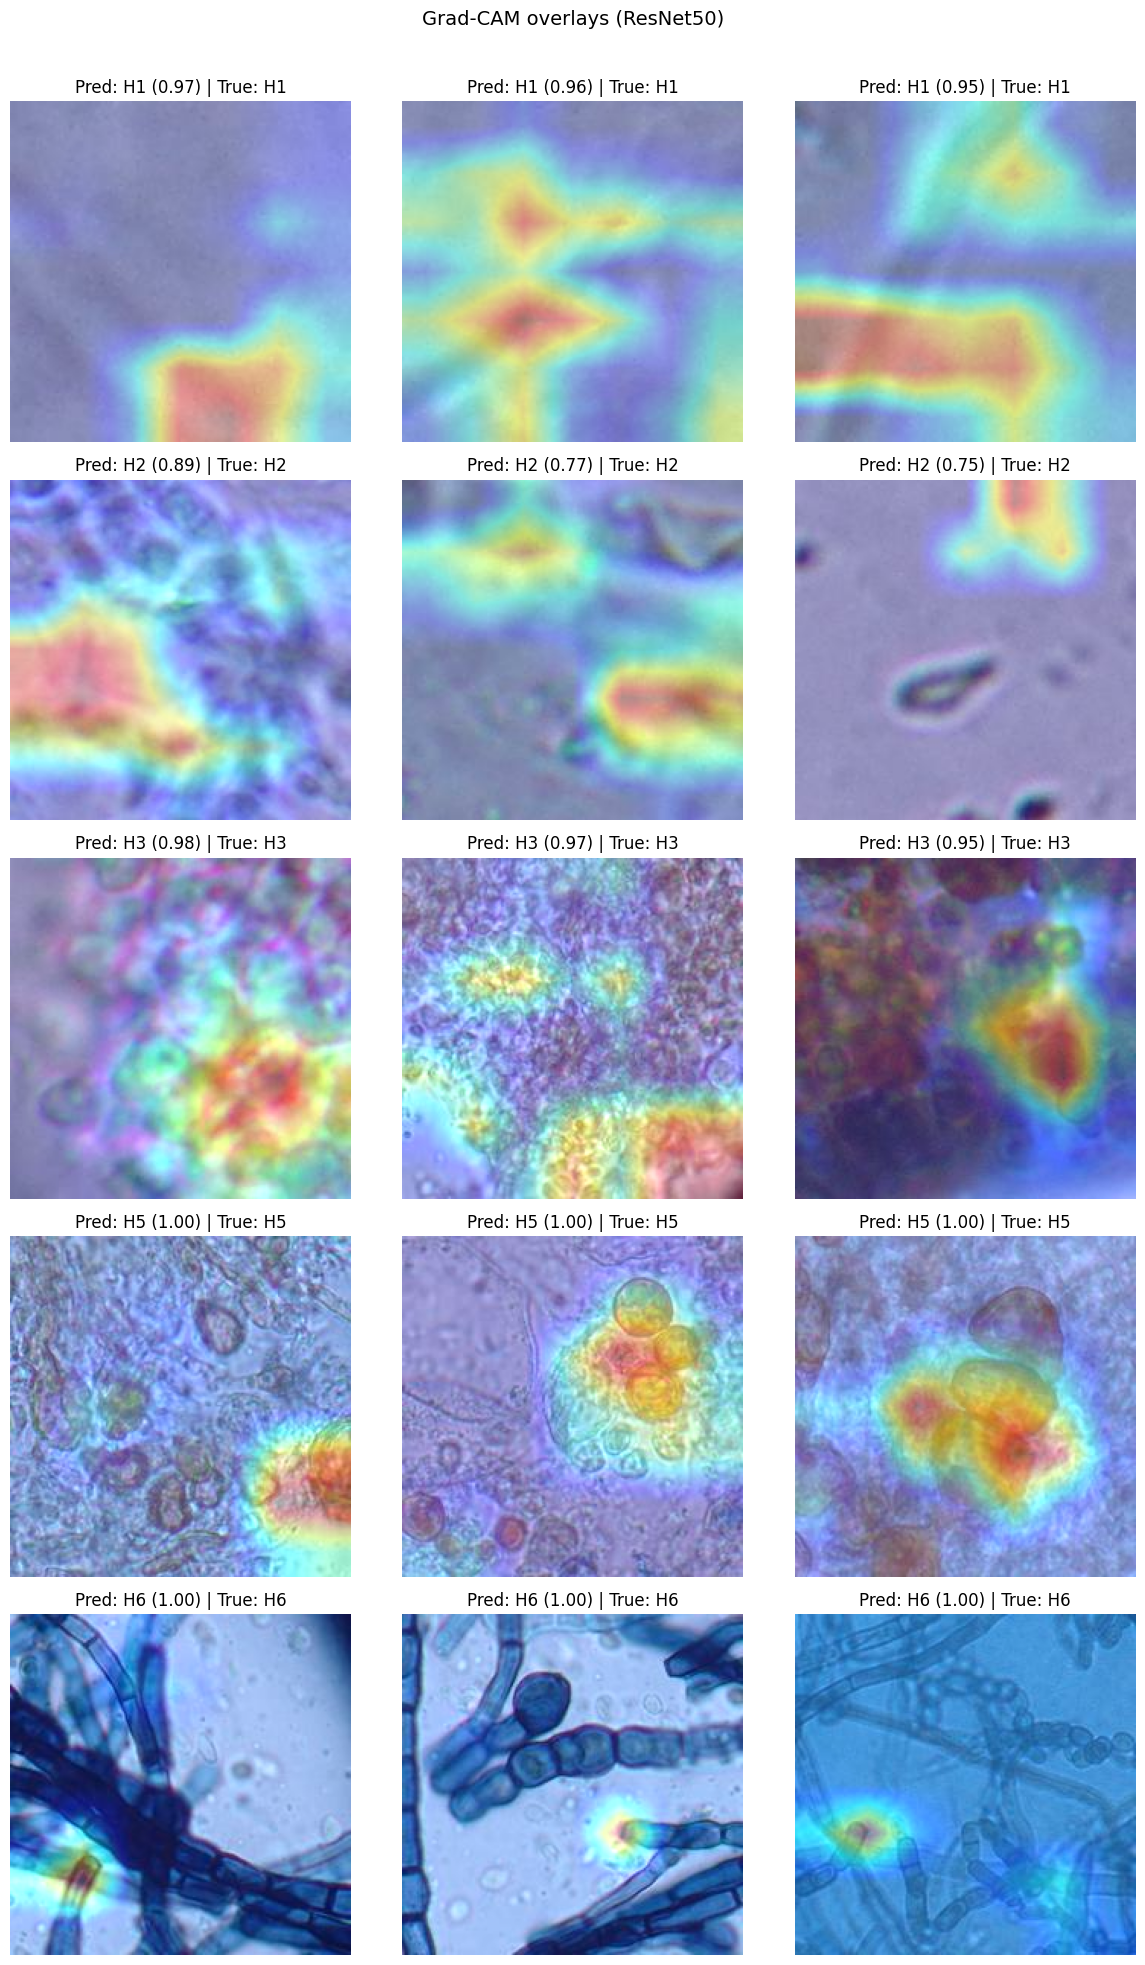

Saved 15 Grad-CAM overlays to: cam_outputs/


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size,
    color_mode='rgb', class_mode='categorical',
    subset='training', shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size,
    color_mode='rgb', class_mode='categorical',
    subset='validation', shuffle=False
)

num_classes = train_gen.num_classes
class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}
print("Classes:", idx_to_class)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

loss_fn = CategoricalCrossentropy(label_smoothing=0.1) if use_label_smoothing else 'categorical_crossentropy'
model.compile(optimizer=Adam(learning_rate=1e-3), loss=loss_fn, metrics=['accuracy'])

cbks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint(STAGE1_PATH, monitor='val_loss', save_best_only=True, verbose=1),
]

print("\n=== Stage 1: Train (frozen backbone) ===")
history1 = model.fit(train_gen, validation_data=val_gen, epochs=initial_epochs, callbacks=cbks, verbose=1)

for layer in base_model.layers[UNFREEZE_FROM:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss=loss_fn, metrics=['accuracy'])
cbks_ft = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint(STAGE2_PATH, monitor='val_loss', save_best_only=True, verbose=1),
]

print("\n=== Stage 2: Fine-tune (unfrozen tail) ===")
history2 = model.fit(train_gen, validation_data=val_gen, epochs=finetune_epochs, callbacks=cbks_ft, verbose=1)

if os.path.exists(STAGE2_PATH):
    model = load_model(STAGE2_PATH)

def find_last_conv_layer(m):
    for layer in reversed(m.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found for Grad-CAM.")

last_conv_layer_name = find_last_conv_layer(model)
print("Grad-CAM target layer:", last_conv_layer_name)

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, class_index=None):

    grad_model = Model([model.inputs],
                       [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array, training=False)
        if class_index is None:
            class_index = tf.argmax(preds[0])
        target = preds[:, class_index]
    grads = tape.gradient(target, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap = heatmap / (tf.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

def overlay_heatmap_on_image(img_uint8, heatmap, alpha=0.35):

    import cv2
    H, W = img_uint8.shape[:2]
    hm = cv2.resize(heatmap, (W, H))
    hm = np.uint8(255 * hm)
    hm = cv2.applyColorMap(hm, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img_uint8, 1.0, hm, alpha, 0)
    return cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

def load_original_and_preprocessed(path, target_size):
    img = load_img(path, target_size=target_size)
    orig_uint8 = np.array(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return orig_uint8, x

val_gen.reset()
probs = model.predict(val_gen, verbose=1)
preds = np.argmax(probs, axis=1)
conf  = probs[np.arange(len(preds)), preds]

val_paths = val_gen.filepaths
val_labels = val_gen.classes
id2name = {v: k for k, v in val_gen.class_indices.items()}

N_PER_CLASS = 3
indices_to_show = []
for cls in range(num_classes):
    idxs = np.where(preds == cls)[0]
    if len(idxs) == 0:
        continue
    idxs = idxs[np.argsort(-conf[idxs])]
    indices_to_show.extend(idxs[:N_PER_CLASS].tolist())

total_needed = N_PER_CLASS * num_classes
if len(indices_to_show) < total_needed:
    extra = total_needed - len(indices_to_show)
    indices_to_show.extend(list(range(extra)))

os.makedirs("cam_outputs", exist_ok=True)

cols = 3
rows = int(np.ceil(len(indices_to_show) / cols))
plt.figure(figsize=(12, 4 * rows))

for i, idx in enumerate(indices_to_show, 1):
    path = val_paths[idx]
    true_id = val_labels[idx]
    pred_id = preds[idx]
    pred_conf = conf[idx]
    true_name = id2name[true_id]
    pred_name = id2name[pred_id]

    orig_uint8, x = load_original_and_preprocessed(path, img_size)
    heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name, class_index=pred_id)
    overlay  = overlay_heatmap_on_image(orig_uint8, heatmap, alpha=0.35)

    base = os.path.splitext(os.path.basename(path))[0]
    plt.imsave(f"cam_outputs/{base}__gradcam_{pred_name}_{pred_conf:.2f}__true_{true_name}.png", overlay)

    plt.subplot(rows, cols, i)
    plt.imshow(overlay)
    plt.title(f"Pred: {pred_name} ({pred_conf:.2f}) | True: {true_name}")
    plt.axis("off")

plt.suptitle("Grad-CAM overlays (ResNet50)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

print(f"Saved {len(indices_to_show)} Grad-CAM overlays to: cam_outputs/")

In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
with zipfile.ZipFile(filename, 'r') as ref:
    ref.extractall('/content/defungi_dataset')

data_dir = '/content/defungi_dataset'
class_names = ['H1', 'H2', 'H3', 'H5', 'H6']

Saving defungi_dataset.zip to defungi_dataset.zip


In [ ]:
import random, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
data_dir = data_dir
batch_size = 64
img_size = (512, 512)
initial_epochs = 7
finetune_epochs = 15
UNFREEZE_FROM = 140
use_label_smoothing = True
STAGE1_PATH = "resnet50_stage1_best.h5"
STAGE2_PATH = "resnet50_finetuned_best.h5"

Found 7295 images belonging to 5 classes.
Found 1819 images belonging to 5 classes.
Classes: {0: 'H1', 1: 'H2', 2: 'H3', 3: 'H5', 4: 'H6'}
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

=== Stage 1: Train (frozen backbone) ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4628 - loss: 1.5592
Epoch 1: val_loss improved from inf to 1.08143, saving model to resnet50_stage1_best.h5


114/114 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.4635 - loss: 1.5570 - val_accuracy: 0.6091 - val_loss: 1.0814 - learning_rate: 0.0010
Epoch 2/7
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6635 - loss: 1.0374
Epoch 2: val_loss did not improve from 1.08143
114/114 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.6636 - loss: 1.0373 - val_accuracy: 0.5943 - val_loss: 1.0871 - learning_rate: 0.0010
Epoch 3/7
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6811 - loss: 0.9875
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 3: val_loss did not improve from 1.08143
114/114 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.6812 - loss: 0.9874 - val_accuracy: 0.6075 - val_loss: 1.0935 - learning_rate: 0.0010
Epoch 4/7
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7164 - loss: 0.9297
Epoch 4: val_loss improved from 1.08143 to 1.07568, saving model to resnet50_stage1_best.h5


114/114 ━━━━━━━━━━━━━━━━━━━━ 375s 3s/step - accuracy: 0.7164 - loss: 0.9297 - val_accuracy: 0.6234 - val_loss: 1.0757 - learning_rate: 2.0000e-04
Epoch 5/7
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7168 - loss: 0.9237
Epoch 5: val_loss improved from 1.07568 to 1.06126, saving model to resnet50_stage1_best.h5


114/114 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.7168 - loss: 0.9237 - val_accuracy: 0.6047 - val_loss: 1.0613 - learning_rate: 2.0000e-04
Epoch 6/7
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7203 - loss: 0.9189
Epoch 6: val_loss improved from 1.06126 to 1.05727, saving model to resnet50_stage1_best.h5


114/114 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.7204 - loss: 0.9188 - val_accuracy: 0.6058 - val_loss: 1.0573 - learning_rate: 2.0000e-04
Epoch 7/7
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7261 - loss: 0.9207
Epoch 7: val_loss did not improve from 1.05727
114/114 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.7261 - loss: 0.9206 - val_accuracy: 0.6196 - val_loss: 1.0792 - learning_rate: 2.0000e-04
Restoring model weights from the end of the best epoch: 6.

=== Stage 2: Fine-tune (unfrozen tail) ===
Epoch 1/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4165 - loss: 1.9418
Epoch 1: val_loss improved from inf to 1.15990, saving model to resnet50_finetuned_best.h5


114/114 ━━━━━━━━━━━━━━━━━━━━ 407s 3s/step - accuracy: 0.4179 - loss: 1.9373 - val_accuracy: 0.6344 - val_loss: 1.1599 - learning_rate: 1.0000e-05
Epoch 2/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7241 - loss: 0.9574
Epoch 2: val_loss improved from 1.15990 to 1.10177, saving model to resnet50_finetuned_best.h5


114/114 ━━━━━━━━━━━━━━━━━━━━ 375s 3s/step - accuracy: 0.7241 - loss: 0.9572 - val_accuracy: 0.6207 - val_loss: 1.1018 - learning_rate: 1.0000e-05
Epoch 3/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7495 - loss: 0.8979
Epoch 3: val_loss improved from 1.10177 to 1.09173, saving model to resnet50_finetuned_best.h5


114/114 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.7495 - loss: 0.8979 - val_accuracy: 0.6163 - val_loss: 1.0917 - learning_rate: 1.0000e-05
Epoch 4/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7573 - loss: 0.8723
Epoch 4: val_loss did not improve from 1.09173
114/114 ━━━━━━━━━━━━━━━━━━━━ 371s 3s/step - accuracy: 0.7573 - loss: 0.8722 - val_accuracy: 0.6130 - val_loss: 1.1094 - learning_rate: 1.0000e-05
Epoch 5/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7998 - loss: 0.8275
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 5: val_loss did not improve from 1.09173
114/114 ━━━━━━━━━━━━━━━━━━━━ 375s 3s/step - accuracy: 0.7997 - loss: 0.8275 - val_accuracy: 0.6064 - val_loss: 1.1328 - learning_rate: 1.0000e-05
Epoch 6/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7879 - loss: 0.8145
Epoch 6: val_loss did not improve from 1.09173
114/114 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.7879 - loss: 0.8145 - val_accura

Grad-CAM target layer: conv5_block3_3_conv
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 529ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 512, 512, 3))
  warnings.warn(msg)


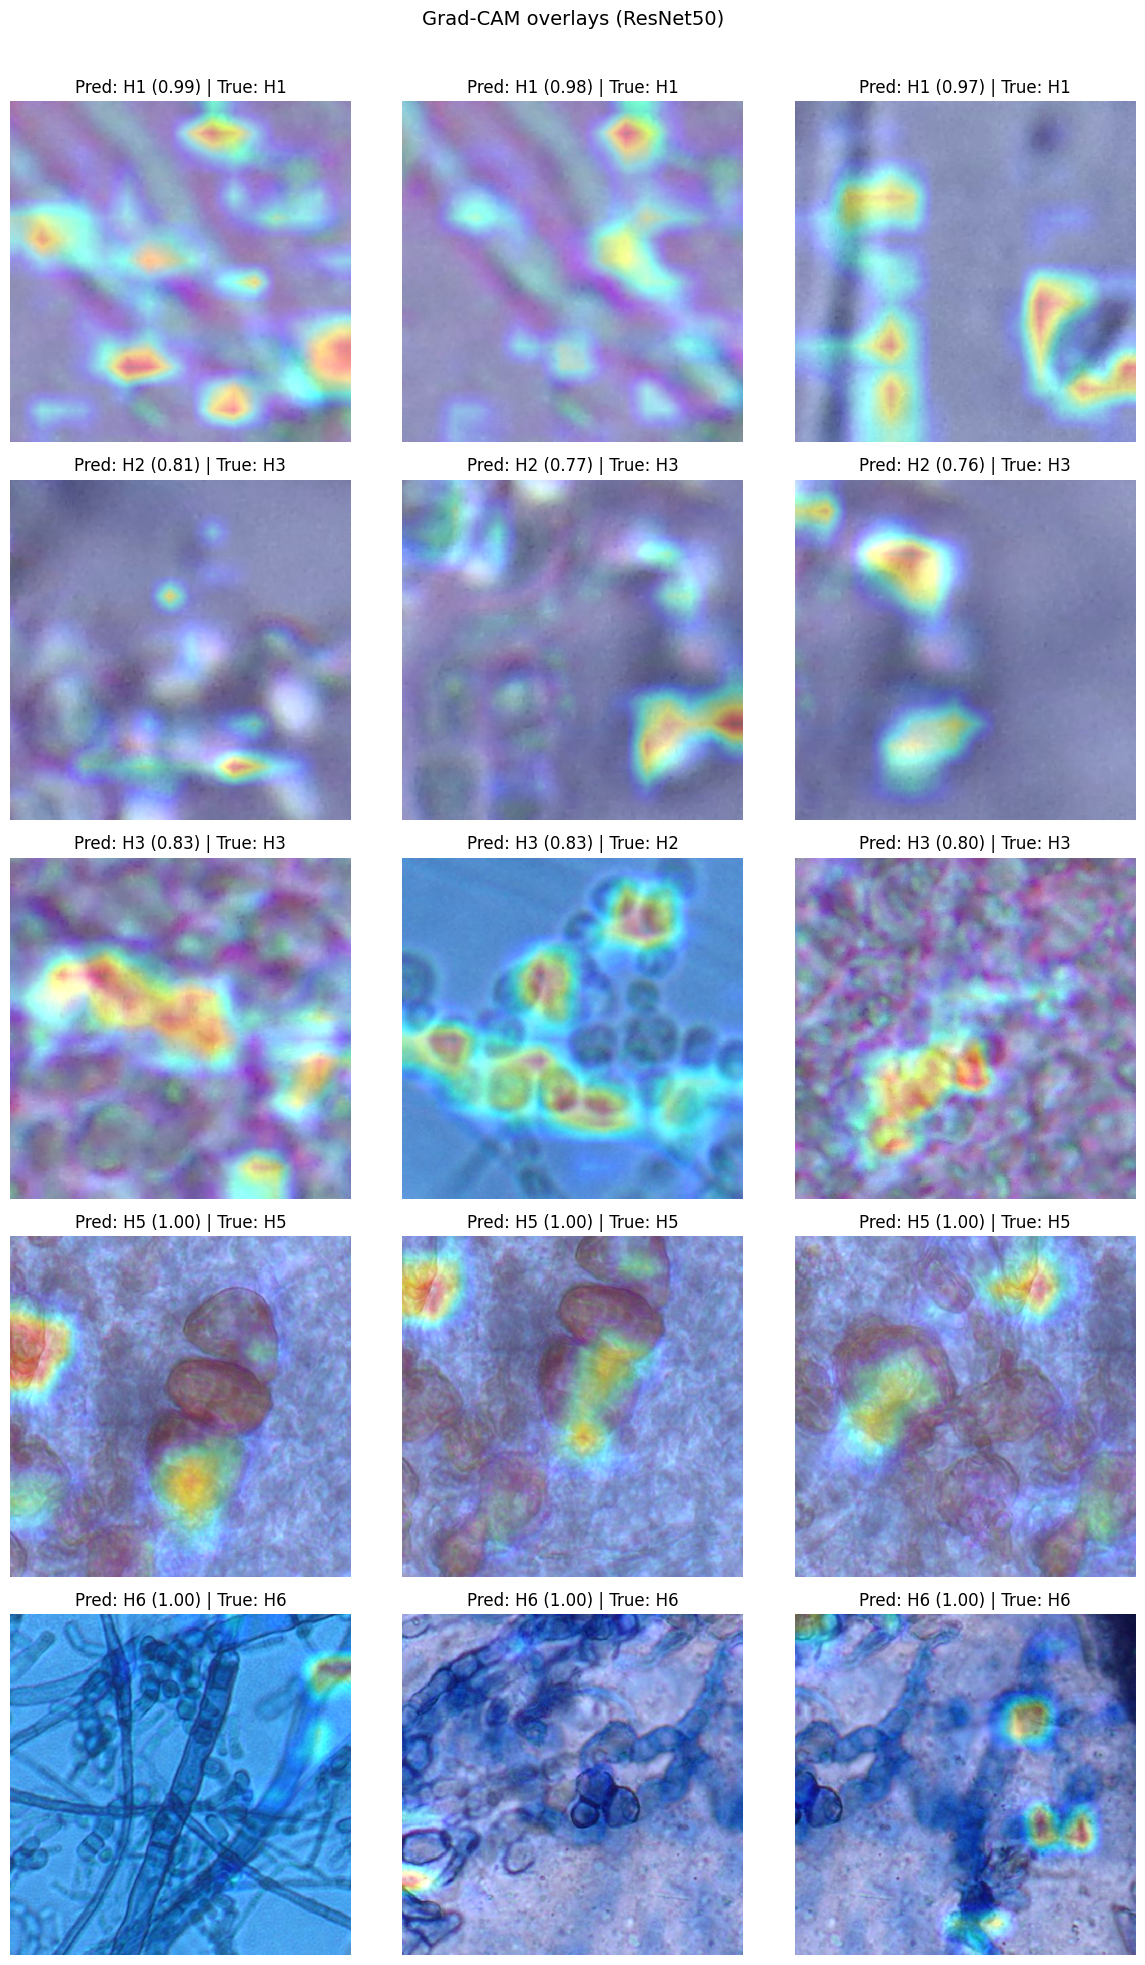

Saved 15 Grad-CAM overlays to: cam_outputs/


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size,
    color_mode='rgb', class_mode='categorical',
    subset='training', shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size,
    color_mode='rgb', class_mode='categorical',
    subset='validation', shuffle=False
)

num_classes = train_gen.num_classes
class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}
print("Classes:", idx_to_class)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

loss_fn = CategoricalCrossentropy(label_smoothing=0.1) if use_label_smoothing else 'categorical_crossentropy'
model.compile(optimizer=Adam(learning_rate=1e-3), loss=loss_fn, metrics=['accuracy'])

cbks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint(STAGE1_PATH, monitor='val_loss', save_best_only=True, verbose=1),
]

print("\n=== Stage 1: Train (frozen backbone) ===")
history1 = model.fit(train_gen, validation_data=val_gen, epochs=initial_epochs, callbacks=cbks, verbose=1)

for layer in base_model.layers[UNFREEZE_FROM:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss=loss_fn, metrics=['accuracy'])
cbks_ft = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1),
    ModelCheckpoint(STAGE2_PATH, monitor='val_loss', save_best_only=True, verbose=1),
]

print("\n=== Stage 2: Fine-tune (unfrozen tail) ===")
history2 = model.fit(train_gen, validation_data=val_gen, epochs=finetune_epochs, callbacks=cbks_ft, verbose=1)

if os.path.exists(STAGE2_PATH):
    model = load_model(STAGE2_PATH)

def find_last_conv_layer(m):
    for layer in reversed(m.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found for Grad-CAM.")

last_conv_layer_name = find_last_conv_layer(model)
print("Grad-CAM target layer:", last_conv_layer_name)

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, class_index=None):

    grad_model = Model([model.inputs],
                       [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array, training=False)
        if class_index is None:
            class_index = tf.argmax(preds[0])
        target = preds[:, class_index]
    grads = tape.gradient(target, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap = heatmap / (tf.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

def overlay_heatmap_on_image(img_uint8, heatmap, alpha=0.35):

    import cv2
    H, W = img_uint8.shape[:2]
    hm = cv2.resize(heatmap, (W, H))
    hm = np.uint8(255 * hm)
    hm = cv2.applyColorMap(hm, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img_uint8, 1.0, hm, alpha, 0)
    return cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

def load_original_and_preprocessed(path, target_size):
    img = load_img(path, target_size=target_size)
    orig_uint8 = np.array(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return orig_uint8, x

val_gen.reset()
probs = model.predict(val_gen, verbose=1)
preds = np.argmax(probs, axis=1)
conf  = probs[np.arange(len(preds)), preds]

val_paths = val_gen.filepaths
val_labels = val_gen.classes
id2name = {v: k for k, v in val_gen.class_indices.items()}

N_PER_CLASS = 3
indices_to_show = []
for cls in range(num_classes):
    idxs = np.where(preds == cls)[0]
    if len(idxs) == 0:
        continue
    idxs = idxs[np.argsort(-conf[idxs])]
    indices_to_show.extend(idxs[:N_PER_CLASS].tolist())

total_needed = N_PER_CLASS * num_classes
if len(indices_to_show) < total_needed:
    extra = total_needed - len(indices_to_show)
    indices_to_show.extend(list(range(extra)))

os.makedirs("cam_outputs", exist_ok=True)

cols = 3
rows = int(np.ceil(len(indices_to_show) / cols))
plt.figure(figsize=(12, 4 * rows))

for i, idx in enumerate(indices_to_show, 1):
    path = val_paths[idx]
    true_id = val_labels[idx]
    pred_id = preds[idx]
    pred_conf = conf[idx]
    true_name = id2name[true_id]
    pred_name = id2name[pred_id]

    orig_uint8, x = load_original_and_preprocessed(path, img_size)
    heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name, class_index=pred_id)
    overlay  = overlay_heatmap_on_image(orig_uint8, heatmap, alpha=0.35)

    base = os.path.splitext(os.path.basename(path))[0]
    plt.imsave(f"cam_outputs/{base}__gradcam_{pred_name}_{pred_conf:.2f}__true_{true_name}.png", overlay)

    plt.subplot(rows, cols, i)
    plt.imshow(overlay)
    plt.title(f"Pred: {pred_name} ({pred_conf:.2f}) | True: {true_name}")
    plt.axis("off")

plt.suptitle("Grad-CAM overlays (ResNet50)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

print(f"Saved {len(indices_to_show)} Grad-CAM overlays to: cam_outputs/")